# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset 

In [2]:
df=pd.read_csv('covid data multiple linear regression.csv')

In [3]:
df.head(3)

,age,Body Temp,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
0,10,Moderate,0,97,127181
1,80,High,0,92,61004
2,10,Low,0,97,111911


# Extracting the dependent and independent data from the dataframe i.e x and y

In [4]:
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [5]:
x,y

(array([[10, 'Moderate', 0, 97],
        [80, 'High', 0, 92],
        [10, 'Low', 0, 97],
        [81, 'High', 4, 75],
        [12, 'Moderate', 0, 97],
        [18, 'Low', 0, 66],
        [13, 'Moderate', 0, 93],
        [94, 'High', 4, 64],
        [86, 'High', 2, 76],
        [20, 'Moderate', 0, 92],
        [15, 'Moderate', 0, 94],
        [15, 'Moderate', 0, 92],
        [16, 'Low', 0, 92],
        [17, 'Moderate', 0, 93],
        [18, 'Moderate', 0, 93],
        [19, 'Moderate', 0, 92],
        [19, 'Moderate', 0, 89],
        [12, 'Moderate', 0, 97],
        [20, 'Moderate', 0, 93],
        [24, 'Moderate', 0, 92],
        [25, 'Moderate', 0, 93],
        [59, 'High', 2, 68],
        [63, 'High', 1, 66],
        [25, 'Moderate', 1, 62],
        [26, 'High', 0, 94],
        [26, 'Low', 0, 97],
        [28, 'Moderate', 0, 99],
        [59, 'High', 0, 69],
        [28, 'Moderate', 0, 89],
        [29, 'Moderate', 0, 93],
        [48, 'Moderate', 0, 93],
        [30, 'Moderate', 0, 6

In [6]:
df.shape

(70, 5)

# Encoding categorical data

Since I am working with regression algorithm and having the categorical data in the dataset will create problem so i will encode it first and then proced further to do anything...

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           70 non-null     int64 
 1   Body Temp                     70 non-null     object
 2   Chronic disease               70 non-null     int64 
 3   Blood O2 Level in Percentage  70 non-null     int64 
 4   Anti Bodies                   70 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.9+ KB


In [9]:
print(x)

[[0.0 0.0 1.0 10 0 97]
 [1.0 0.0 0.0 80 0 92]
 [0.0 1.0 0.0 10 0 97]
 [1.0 0.0 0.0 81 4 75]
 [0.0 0.0 1.0 12 0 97]
 [0.0 1.0 0.0 18 0 66]
 [0.0 0.0 1.0 13 0 93]
 [1.0 0.0 0.0 94 4 64]
 [1.0 0.0 0.0 86 2 76]
 [0.0 0.0 1.0 20 0 92]
 [0.0 0.0 1.0 15 0 94]
 [0.0 0.0 1.0 15 0 92]
 [0.0 1.0 0.0 16 0 92]
 [0.0 0.0 1.0 17 0 93]
 [0.0 0.0 1.0 18 0 93]
 [0.0 0.0 1.0 19 0 92]
 [0.0 0.0 1.0 19 0 89]
 [0.0 0.0 1.0 12 0 97]
 [0.0 0.0 1.0 20 0 93]
 [0.0 0.0 1.0 24 0 92]
 [0.0 0.0 1.0 25 0 93]
 [1.0 0.0 0.0 59 2 68]
 [1.0 0.0 0.0 63 1 66]
 [0.0 0.0 1.0 25 1 62]
 [1.0 0.0 0.0 26 0 94]
 [0.0 1.0 0.0 26 0 97]
 [0.0 0.0 1.0 28 0 99]
 [1.0 0.0 0.0 59 0 69]
 [0.0 0.0 1.0 28 0 89]
 [0.0 0.0 1.0 29 0 93]
 [0.0 0.0 1.0 48 0 93]
 [0.0 0.0 1.0 30 0 62]
 [0.0 0.0 1.0 30 0 86]
 [0.0 0.0 1.0 32 0 84]
 [0.0 0.0 1.0 34 1 90]
 [0.0 0.0 1.0 35 0 89]
 [1.0 0.0 0.0 50 2 77]
 [1.0 0.0 0.0 56 2 76]
 [1.0 0.0 0.0 56 1 77]
 [1.0 0.0 0.0 36 1 90]
 [1.0 0.0 0.0 38 2 75]
 [0.0 0.0 1.0 40 0 90]
 [1.0 0.0 0.0 40 0 92]
 [1.0 0.0 0

# Splitting the data into train_test_split

In [10]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape

(56, 6)

In [12]:
y_train.shape

(56,)

In [13]:
x_test.shape

(14, 6)

# Training the multiple Linear Regression model on the training set

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

# Predicting the model on testing set

In [16]:
y_pred=lr.predict(x_test)
print(y_pred)

[ 60533.33522483 106619.44574447  62772.08993545 105434.51844076
  62980.88650911  99354.4885685  102651.88699213  89229.20326704
  82388.27687952 104969.02648192  83042.3669549   99019.40840415
 103836.81429584  95072.01490493]


In [17]:
print(y_test)

[ 59994 127181  50104 110911  62019  97101 101000  90015  84008 100000
  75012  98101 112101  99110]


# To check the error and accuracy of the model I will import...

MAE(Mean Absolute error), MSE(Mean squared error), RMSE(Root mean squre error), R2_Score, Adjusted R2_Score

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [19]:
print('Mean absolute error is:',mean_absolute_error(y_test,y_pred))

Mean absolute error is: 5195.586824172785


In [20]:
print('Mean squared error is:',mean_squared_error(y_test,y_pred))

Mean squared error is: 57152676.84765665


In [21]:
print('Root mean square error is:',np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error is: 7559.938944704292


In [22]:
print('R2_Score is:',r2_score(y_test,y_pred))

R2_Score is: 0.8721939373674318


# Visualizing the model

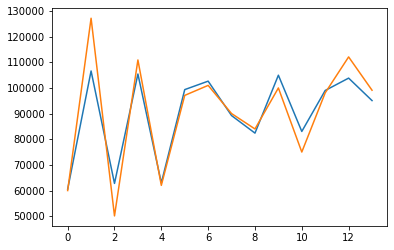

In [23]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()